In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn import preprocessing

In [4]:
df=pd.read_csv("admission.csv")

### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [5]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
40,41,308,110,3,3.5,3.0,8.00,1,0.46
72,73,321,111,5,5.0,5.0,9.45,1,0.93
87,88,317,107,2,3.5,3.0,8.28,0,0.66
194,195,316,109,3,3.5,3.0,8.76,0,0.77
398,399,312,103,3,3.5,4.0,8.78,0,0.67
102,103,314,106,2,4.0,3.5,8.25,0,0.62
407,408,298,100,3,2.5,4.0,7.95,1,0.58
58,59,300,99,1,3.0,2.0,6.80,1,0.36
220,221,313,103,3,4.0,4.0,8.75,0,0.76
82,83,320,110,5,5.0,4.5,9.22,1,0.92


In [ ]:
b) Generate the description for numeric variables


In [6]:
df.describe(include='number')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
c) Check the shape of the data set


In [7]:
df.shape

(500, 9)

In [ ]:
d) Generate the correlation matrix


In [8]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [ ]:
e) Generate a correlogram


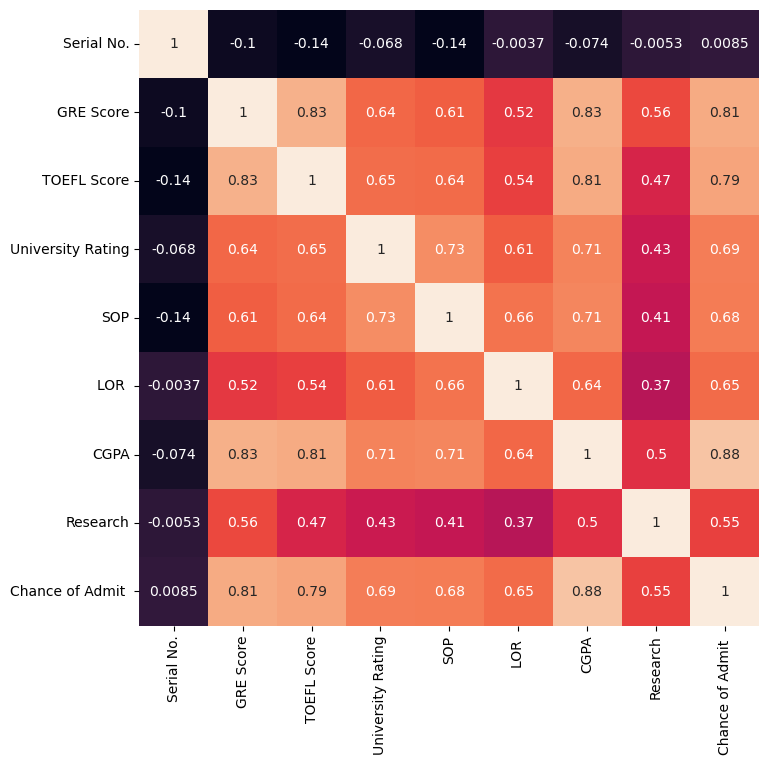

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()

### Q.2 Find out the minimum and maximum values for GRE score


In [10]:
#Minimum Value
df['GRE Score'].min()

290

In [11]:
#Maximum Value
df['GRE Score'].max()


340

### Q.3 Find out the percentage of universities for each university rating

In [12]:
df['University Rating'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


3    32.4%
2    25.2%
4    21.0%
5    14.6%
1     6.8%
Name: University Rating, dtype: object

### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [13]:
df['Chance of Admit '].value_counts()


0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit , Length: 61, dtype: int64

In [14]:
#Variable conversion
df['Chance of Admit '] = np.where(df['Chance of Admit '] >=0.80, 1, df['Chance of Admit '])
df['Chance of Admit '] = np.where(df['Chance of Admit '] <0.80, 0, df['Chance of Admit '])


In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [16]:
#Counts of 'Chance of Admit' variable 
df['Chance of Admit '].value_counts()

0.0    345
1.0    155
Name: Chance of Admit , dtype: int64

### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [17]:
X=df.drop('Chance of Admit ',axis=1 )
y=df['Chance of Admit ']

In [18]:
#Importing the 'train_test_split' package and Spliding the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [19]:
#Importing the 'DecisionTreeClassifier' Model and 

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [20]:
model.score(X_train, y_train)

0.94

In [21]:
model.score(X_test, y_test)


0.94

In [22]:
from sklearn.metrics import accuracy_score

# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}

# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)

# Prediction sets
preds_1 = model_1.predict(X_test)
preds_2 = model_3.predict(X_test)
preds_3 = model_3.predict(X_test)
preds_4 = model_4.predict(X_test)
preds_5 = model_5.predict(X_test)

print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(y_test, preds_3), 3)}')
print(f'Accuracy on Model 4: {round(accuracy_score(y_test, preds_4), 3)}')
print(f'Accuracy on Model 5: {round(accuracy_score(y_test, preds_5), 3)}')

Accuracy on Model 1: 0.95
Accuracy on Model 2: 0.92
Accuracy on Model 3: 0.92
Accuracy on Model 4: 0.94
Accuracy on Model 5: 0.95
